## **Overview of Multiclass Classification: one-vs-all and all-pairs**

Give an overview of the algorithm and describe its advantages and disadvantages.

#### <ins>One-vs-All

This algorithm creates a classifier for each class (3 classifiers if there exists 3 classes). For each classifier, it is responsible for predicting whether an input belongs to its corresponding class or not.

Each classifier is trained on the entire dataset with modifications corresponding to each classifier.\
The modification changes the dataset such that when you're training a classifier for class $3$, labels for all the other classes are modified to $-1$ and labels for the classifier's class are modified to $1$. (More details will be provided in the Representation section)

#### <ins>All-Pairs

This algorithm creates a classifier for each pair of classes. For each classifier, it is responsible for predicting whether a given input belongs to one class or the other.

Each classifier is trained a portion of the dataset with modifications corresponding to each classifier.\
First, each classifier is assigned portion of the dataset that contains the classes the classifier is predicting for. Then, the assigned data's classes are changed so that one class is assigned the label of $1$ and the other is assigned the label of $-1$.

#### <ins>Advantages and Disadvantages of Multiclass Classification

Multiclass classification algorithm is an algorithm that classifies an input that can belong to one of the multiple classes (more than two classes).\
For this project, we will be implementing One-vs-All and All-Pairs algorithms for the multiclass classification of the UCI Iris dataset.

Compared to a multiclass classification algorithm that inherently encompasses multiclass classification (output of model predicts multiclass),
the main advantages of One-vs-All and All-Pairs stems from the use of binary classifiers.\
Because of the binary classifiers to represent multiclass classification, these two algorithms have implementation simplicity and easy interpretability of the predictions.

Unfortunately, the disadvantages also stem from the use of binary classifiers.
- The binary classifiers do not have any knowledge that it is used for multiclass classification and therefore, does not have inherent understanding of the multiclass classification problem.
- Due to training classifier for each class, each classifier is trained on a class imbalanced dataset and may result in overfitting.
- Training multiple classifiers can be computationally expensive.

#### <ins>Misc.

In this final project, we will be using the UCI Iris dataset we encountered in our previous homework:\
[`https://archive.ics.uci.edu/dataset/53/iris`](https://archive.ics.uci.edu/dataset/53/iris)

What we will be comparing to:
[scikit-learn multiclass classification](https://scikit-learn.org/1.5/modules/multiclass.html#multiclass-classification)


### Representation: Logistic Regression

#### Binary Logistic Regression
Given sample's feature values $x \in \mathbb{R}^{d}$ and a label $y  \in \{0, 1\}$, binary classification of input $x$ is predicted through combination of affine function and sigmoid function.
$$ y = \langle w, x\rangle $$ 
$$\sigma (y) = \frac{1}{1 + e^{-y}}$$
Therefore, our hypothesis function defined on weights $w$ is
$$h_{w}(x) = \frac{1}{1 + e^{-\langle w, x\rangle}}$$

#### Multiclass Logistic Regression
Now, using the binary logistic regression defined above, we will define one-vs-all and all-pairs multiclass logistic regression algorithms.

Pseudocode for one-vs-all (from textbook):

Given inputs:\
training set $S = (x_1, y_1), ..., (x_m, y_m)$\
binary classifier - logistic regression $L$

$\text{foreach } i \in Y:$\
$\text{ let } S_i = (x_1, (-1)^{\mathbb{1}_{[y_1 \neq i]}}), ..., (x_m, (-1)^{\mathbb{1}_{[y_m \neq i]}})$\
$\text{ let } h_i = L(S_i)$

Predicts:\
$ h(x) \in argmax_{i \in Y }\text{ }h_i(x)$


Pseudocode for all-pairs (from textbook):

Given inputs:\
training set $S = (x_1, y_1), ..., (x_m, y_m)$\
binary classifier - logistic regression $L$

$\text{foreach } i,j \in Y \text{ such that } i < j$\
$\text{ initialize empty } S_{i,j}$\
$\text{ for } t = 1, ..., m$\
$\text{ }\text{ If } y_t = i \text{, then add } (x_t, 1) \text{ to } S_{i,j}$
$\text{ }\text{ If } y_t = j \text{, then add } (x_t, -1) \text{ to } S_{i,j}$
$\text{ let } h_{i,j} = L(S_{i,j}$

Predicts:\
$ h(x) \in argmax_{i \in Y }\text{ } (\Sigma_{j \in Y} \text{ sign}(j-i) h_{i,j}(x))$



### Loss: Logistic Loss + Regularization

The loss function of a Logistic Regression classifier over $k$ classes is the **log-loss**, also called **cross-entropy loss**. Since we will only use binary classifier, e.g. Binary Logistic Regression, in this project, only **Binary Log Loss** will be introduced in this section.

The Binary Log Loss on a sample of m data points, also called the Binary Cross Entropy Loss, is:
$$L_S(h) = -\frac{1}{m} \sum_{i=1}^m (y_i \log h(x_i) + (1 - y_i)\log (1 - h(x_i)))$$

The corresponding gradient of the Binary Log loss with respect to the model's wights is:
$$\frac{\partial L_S(h)}{\partial w_j} = \frac{1}{m} \sum_{i=1}^m (h(x_i) - y_i)x_{ij}$$

We also implement the L2 norm of wights to adpot Tikhonov regularization into our loss function. The L2 norm of wights is:
$$\lambda||w||_2^2 = \lambda\sum_{i=1}^{d}w_i^2$$ 
And the gradient of the L2 term with respect to the model's weights is:
$$\frac{\partial \lambda\sum_{i=1}^{d}w_i^2}{\partial w_j} = 2\lambda w_j$$

In conclusion, the total loss function would be:
$$L_S(h) = -\frac{1}{m} \sum_{i=1}^m (y_i \log h(x_i) + (1 - y_i)\log (1 - h(x_i)))+ \lambda\sum_{i=1}^{d}w_i^2$$

### Optimizer

**One-vs-All** and **All-Pairs** are both strategies used to solve muticlass classification problems by utilizing binary classifiers. In this case, Stochastic Gradient Descent (Mini Batch) is a suitable choice.   
In gradient descent, the general formula for weight update is:
$$w_j = w_j - \alpha \cdot \frac{\partial L}{\partial w_j}$$  

For each batch of size $m$, the gradient of the binary log loss with respect to the weight is:
$$\frac{\partial L}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (h(x_i) - y_i) \cdot x_{ij}$$  

If incorporate regularization (mentioned in the previous section), the total gradient becomes:
$$\frac{\partial L}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (h(x_i) - y_i) \cdot x_{ij} + 2 \lambda w_j$$
Thus, the final weight update equation is: 
$$w_j = w_j - \alpha \cdot \left( \frac{\partial L}{\partial w_j} + 2 \lambda w_j \right)$$  

Due to the nature of One-vs-All and All-pairs strategies, we apply this optimizer differently compared to direct multiclass classification techniques, such as multiclass logistic regression.  
**One-vs-All**: for each class $j$, you train a seperate binary classifier that distinguishes class $j$ from all other classes.  
**All-pairs**: for each unique class pair $(i, j)$, you train a binary classifier that differentiates between those two classes.  

#### Pseudocode: Stochastic Gradient Descent for Logistic Regression (Lecture 6 Slide 21)  
**Inputs**: Traning examples $S$, step size $\alpha$, batch size $b < |S|$  
Set converged false  
**while** not converged:  
&nbsp;&nbsp;&nbsp;&nbsp;Randomly shuffle $S$  
&nbsp;&nbsp;&nbsp;&nbsp;**for** $i = 0$ to $|S|/b - 1$:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$S'$ = Extracted current batch using $i$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\mathbf{w} = \mathbf{w} - \alpha \cdot \nabla L_{S'}(h_w)$ + regularization  
&nbsp;&nbsp;&nbsp;&nbsp;converged = check_convergence$(S,w)$  
return

## **Model**

In [1]:
import numpy as np
from sklearn.linear_model import SGDClassifier

def sigmoid(x):
    '''
        Sigmoid function f(x) =  1/(1 + exp(-x))
        :param x: A scalar or Numpy array
        :return: Sigmoid function evaluated at x (applied element-wise if it is an array)
    '''
    return np.where(x > 0, 1 / (1 + np.exp(-x)), np.exp(x) / (np.exp(x) + np.exp(0)))

def get_estimator(train_epochs, lr):
    estimator = SGDClassifier(
        loss='log_loss',
        tol=None,
        max_iter=train_epochs,
        shuffle=True,
        random_state=0,
        learning_rate='constant',
        eta0=lr,
        alpha=0)
    return estimator

## Model: Standard Scaler

In [2]:
import numpy as np

class StandardScaler:
    def _init_(self, X):
        self.num_samples = X.shape[0]
        self.n_features = X.shape[1] # can include bias or not
        self.mean = None
        self.std = None
    
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
    
    def center(self, X):
        return X - self.mean
    
    def scale(self, X):
        X_centered = X - self.mean
        X_scaled = X_centered/self.std
        return X_scaled

## **Model: Representation - Logistic Regression**

In [26]:
import numpy as np

class MyLogisticRegression:
    '''
    Binary Logistic Regression that learns weights using 
    stochastic gradient descent.
    '''
    def __init__(self, batch_size=1, num_epochs=1, lr=0.0001, tol=1e-4):
        '''
        Initializes a LogisticRegression classifer.
        @attrs:
            n_features: the number of features in the classification problem
            n_classes: the number of classes in the classification problem
            weights: The weights of the Logistic Regression model
            alpha: The learning rate used in stochastic gradient descent
        '''
        self.learning_rate = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.weights = None
        self.tol = tol

    def train(self, X, Y):
        '''
        Train the model, using batch stochastic gradient descent
        @params:
            X: a 2D Numpy array where each row contains an example, padded by 1 column for the bias
            Y: a 1D Numpy array containing the corresponding labels for each example
        @return:
            None
        '''
        num_samples, num_features = X.shape
        previous_loss = float('inf')
        self.weights = np.zeros((1, num_features))

        for epoch in range(self.num_epochs):
            shuffled_inds = np.random.permutation(num_samples)
            shuffled_X = X[shuffled_inds]
            shuffled_Y = Y[shuffled_inds]

            for start in range(0, num_samples, self.batch_size):
                end = start + self.batch_size
                X_batch = shuffled_X [start: min(end, num_samples)] 
                Y_batch = shuffled_Y [start: min(end, num_samples)] 

                predictions = sigmoid(np.dot(X_batch, self.weights.T)) # num_samples * 1 (num_classes)
                Y_batch = np.reshape(Y_batch,(len(Y_batch),1)) # num_samples * 1, reshape Y to same dimensions of sigmoid
                error = predictions - Y_batch
                loss_grad = np.dot(error.T, X_batch)/len(X_batch)
    
                self.weights -= self.learning_rate * loss_grad
            
            current_loss = self.loss(X, Y)

            # if abs(previous_loss - current_loss) < self.tol:
            #     # print(f'Convergence reached at epoch {epoch + 1}')
            #     break
            

            #print(f"Epoch {epoch + 1}, Weights: {self.weights}")
                          

    def loss(self, X, Y):
        '''
        Computes the logistic loss (binary cross-entropy loss) for binary classification
        @params:
            X: 2D Numpy array where each row contains an example, padded by 1 column for the bias
            Y: 1D Numpy array containing the corresponding labels for each example
        @return:
            A float number which is the average loss of the model on the dataset
        '''
        # Clip predictions to prevent log(0)
        y_pred = self.predict(X)
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        
        left_half = Y.T @ np.log(y_pred)
        right_half = (1-Y).T @ np.log(1-y_pred)
        
        # Calculate the logistic loss
        loss = -np.mean(left_half + right_half)
        return loss


    def predict(self, X):
        '''
        Compute predictions based on the learned parameters and examples X
        @params:
            X: a 2D Numpy array where each row contains an example, padded by 1 column for the bias
        @return:
            A 1D Numpy array with one element for each row in X containing the predicted class.
        '''
        # X.shape: (batch size, num features)
        # self.weights.shape: (1, num features)
        dot_product = np.dot(self.weights, X.T) # n_classes * n_samples
        probs = sigmoid(dot_product)
        probsall = np.vstack((1-probs, probs)) # probs are for class 2
        y_predict = np.argmax(probsall, axis=0) #finding the index of the max value in a column
        return y_predict


    def accuracy(self, X, Y):
        '''
        Output the accuracy of the trained model on a given testing dataset X and labels Y.
        @params:
            X: a 2D Numpy array where each row contains an example, padded by 1 column for the bias
            Y: a 1D Numpy array containing the corresponding labels for each example
        @return:
            a float number indicating accuracy (between 0 and 1)
        '''
        predicted_classes = self.predict(X)
        return np.mean(predicted_classes == Y)
    
    def predict_proba(self, X):
        '''
        Compute probabilities for the input data X.
        @params:
        X: A 2D Numpy array where each row contains an example
        @return:
        Probabilities of each example being in class 1
        '''
        dot_product = np.dot(self.weights, X.T) # n_classes * n_samples
        probs = sigmoid(dot_product)
        
        return probs

## **Model: one-vs-all**

In [27]:
import numpy as np

class OnevsAll:
    def __init__(self, n_classes, batch_size=1, epochs=1, lr=0.01):
        self.n_classes = n_classes
        self.lr = lr
        self.batch_size = batch_size
        self.epochs = epochs
        # self.conv_threshold = conv_threshold

    def train(self, X, Y):
        # Split data and train each representation
        self.S_Y = np.array([np.array(Y) for _ in range(self.n_classes)])
        self.h = np.array([
            MyLogisticRegression(
                batch_size=self.batch_size, 
                num_epochs=self.epochs, 
                lr=self.lr, 
                tol=0) for _ in range(self.n_classes)])
        
        self.conv_epochs = [0] * self.n_classes
        for cls in range(self.n_classes):
            # Create S_i for each class i
            S_Y_i = self.S_Y[cls]
            cls_idx = S_Y_i == cls
            S_Y_i[cls_idx] = 1
            non_cls_idx = np.logical_not(cls_idx)
            S_Y_i[non_cls_idx] = 0
            
            # Train h_i for each class i on S_i
            h_i = self.h[cls]
            conv_epoch = h_i.train(X, S_Y_i)
            self.conv_epochs.append(conv_epoch)
        
            
    # def loss(self, X, Y):
    #     preds = self.predict(X)
    #     # L1-loss
    #     losses = np.abs(Y-preds)
    #     losses = np.sum(losses)
    #     return losses

    def predict(self, X):
        # h_i in argmax h_i(x)
        predictions = [0] * X.shape[0]
        for i, x in enumerate(X):
            preds = [0] * self.n_classes
            # Get predictions from all hypotheses
            for c in range(self.n_classes):
                preds[c] = self.h[c].predict_proba(x)
            # Select max prediction
            predictions[i] = np.argmax(preds)
            
        return predictions

    def accuracy(self, preds, Y):
        correct_preds = Y == preds
        return np.sum(correct_preds) / Y.shape[0]

## **Model: all-pairs**

In [21]:
# You can only use python and numpy in this section.
import numpy as np

class AllPairs:
    def __init__(self, n_classes, conv_threshold, batch_size, epochs, lr):
        self.n_classes = n_classes
        self.batch_size = batch_size
        self.epochs = epochs
        self.conv_threshold = conv_threshold
        self.models = {}
        self.lr = lr

    def train(self, X, Y):
        
        for i in range(self.n_classes):
            for j in range(i + 1, self.n_classes):
                selected_indices = []
                for index, label in enumerate(Y):
                    if label == i or label == j:
                        selected_indices.append(index)

                X_selected = X[selected_indices]
                Y_selected = Y[selected_indices]
                
                for idx in range(len(Y_selected)):
                    if Y_selected[idx] == i:
                        Y_selected[idx] = 0
                    else:
                        Y_selected[idx] = 1

                model = MyLogisticRegression(batch_size=self.batch_size, num_epochs=self.epochs, lr=self.lr, tol=self.conv_threshold)
                model.train(X_selected, Y_selected)
                key = i, j
                self.models[key] = model

    def loss(self, X, Y):
        '''
        Average Logistic loss?
        total_loss = 0
        for (i, j), model in self.models.items():
            selected_indices = []
            for index, label in enumerate(Y):
                    if label == i or label == j:
                        selected_indices.append(index)

            X_selected = X[selected_indices]
            Y_selected = Y[selected_indices]
            
            Y_selected = np.where(Y_selected == i, 0, 1)
            total_loss += model.loss(X_selected, Y_selected)

        return total_loss / len(self.models)
        
        '''
        prediction = self.predict(X)
        losses = np.abs(Y - prediction)
        return np.sum(losses)

    def predict(self, X):
        votes = np.zeros((X.shape[0], self.n_classes))
        for key in self.models:
            i, j = key
            model = self.models[key]
            prediction = model.predict(X)
    
            for idx in range(len(prediction)):
                if prediction[idx] == 0:
                    votes[idx, i] = votes[idx, i] + 1 
                elif prediction[idx] == 1:
                    votes[idx, j] = votes[idx, j] + 1
        return np.argmax(votes, axis=1)
        

    def accuracy(self, X, Y):
        predictions = self.predict(X)
        return np.mean(predictions == Y)

## **Check Logistic Regression**

In [28]:
import pytest
import numpy as np
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

def CheckPlot_LR(X, Y, X_test, Y_test, lr, num_epochs):
    '''
    This is used for visualizing the differences of our logistic regression model
    and the SGD classifier from sklearn.
    '''
    # train my models
    X_bias = np.c_[X, np.ones(X.shape[0])]
    my_model = MyLogisticRegression(lr=lr, batch_size=1, num_epochs=num_epochs)
    my_model.train(X_bias, Y)
    
    # train sklearn model
    # SGDClassifier is always batch_size == 1
    sklearn_model = SGDClassifier(
    loss='log_loss',
    tol=None,
    max_iter=num_epochs,
    shuffle=True,
    random_state=0,
    learning_rate='constant',
    eta0=lr,
    alpha=0)
    sklearn_model.fit(X, Y)

    weights = my_model.weights
    assert isinstance(weights, np.ndarray)
    assert weights.ndim==2 and weights.shape == (1,X.shape[1]+1)
    # FIXME: relative tolerance might be not strict enough
    print('my weight', weights)
    print('sklearn weight', sklearn_model.coef_[0], sklearn_model.intercept_[0])
    assert weights[0][:-1] == pytest.approx(sklearn_model.coef_[0], 0.01)
    assert weights[0][-1] == pytest.approx(sklearn_model.intercept_[0], 0.01)
    
    # Create a meshgrid and predict on the grid points
    x_min = min(X[:, 0].min(), X_test[:, 0].min())
    x_max = max(X[:, 0].max(), X_test[:, 0].max())
    y_min = min(X[:, 1].min(), X_test[:, 1].min())
    y_max = max(X[:, 1].max(), X_test[:, 1].max())
    x_gap = x_max - x_min
    y_gap = y_max - y_min

    xx, yy = np.meshgrid(np.linspace(x_min -x_gap/100, x_max + x_gap/100, 200), np.linspace(y_min-y_gap/100, y_max + y_gap/100, 200))
    bias = np.ones(xx.ravel().shape) 
    features_with_bias = np.c_[xx.ravel(), yy.ravel(), bias] 

    my_Z = my_model.predict(features_with_bias)
    my_Z = my_Z.reshape(xx.shape)

    sklearn_Z = sklearn_model.predict(np.c_[xx.ravel(), yy.ravel()])
    sklearn_Z = sklearn_Z.reshape(xx.shape)

    # check test data predictions
    X_test_bias = np.c_[X_test, np.ones(X_test.shape[0])]
    my_preds = my_model.predict(X_test_bias)
    sklearn_preds = sklearn_model.predict(X_test)
    assert (my_preds == sklearn_preds).all()

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot my model's results
    axes[0].contourf(xx, yy, my_Z, alpha=0.3, colors=['blue', 'red'], levels=[0, 0.5, 1])
    train_data_label1 = X[np.where(Y == 1)]
    train_data_label0 = X[np.where(Y == 0)]
    test_data_label1 = X_test[np.where(Y_test == 1)]
    test_data_label0 = X_test[np.where(Y_test == 0)]
    axes[0].scatter(train_data_label1[:, 0], train_data_label1[:, 1], c='red', edgecolor='k', label='Train Data Label 1')
    axes[0].scatter(train_data_label0[:, 0], train_data_label0[:, 1], c='blue', edgecolor='k', label='Train Data Label 0')
    axes[0].scatter(test_data_label1[:, 0], test_data_label1[:, 1], c='red', edgecolor='k', label='Test Data Label 1', marker='*')
    axes[0].scatter(test_data_label0[:, 0], test_data_label0[:, 1], c='blue', edgecolor='k', label='Test Data Label 0', marker='*')
    axes[0].set_title("Decision Boundary (My Model)")
    axes[0].set_xlabel("Feature 1")
    axes[0].set_ylabel("Feature 2")
    axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Plot sklearn model's results
    axes[1].contourf(xx, yy, sklearn_Z, alpha=0.3, colors=['blue', 'red'], levels=[0, 0.5, 1])
    axes[1].scatter(train_data_label1[:, 0], train_data_label1[:, 1], c='red', edgecolor='k', label='Train Data Label 1')
    axes[1].scatter(train_data_label0[:, 0], train_data_label0[:, 1], c='blue', edgecolor='k', label='Train Data Label 0')
    axes[1].scatter(test_data_label1[:, 0], test_data_label1[:, 1], c='red', edgecolor='k', label='Test Data Label 1', marker='*')
    axes[1].scatter(test_data_label0[:, 0], test_data_label0[:, 1], c='blue', edgecolor='k', label='Test Data Label 0', marker='*')
    axes[1].set_title("Decision Boundary (Sklearn Model)")
    axes[1].set_xlabel("Feature 1")
    axes[1].set_ylabel("Feature 2")
    axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

    my_acc = my_model.accuracy(X=X_test_bias, Y=Y_test)
    sklearn_acc = sklearn_model.score(X=X_test,y=Y_test)
    print('The Accuracy of My Logistic Regression Model is ', my_acc)
    print('The Accuracy of Sklearn SGD Classifier is ', sklearn_acc)

### 5-Point Toy Dataset

my weight [[ 0.92576285 -0.90322934 -0.06666839]]
sklearn weight [ 0.92612921 -0.90302204] -0.06641289485959871


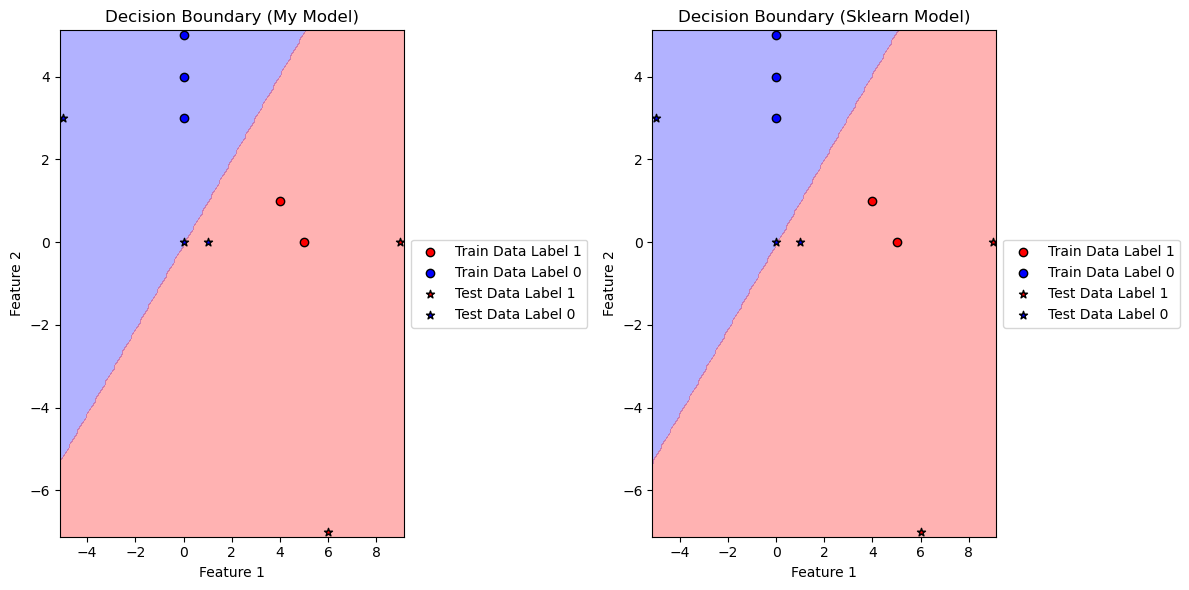

The Accuracy of My Logistic Regression Model is  0.8
The Accuracy of Sklearn SGD Classifier is  0.8


In [29]:
# Set random seed for testing purposes
np.random.seed(0)

# Create Data
X1_train = np.array([[0,4], [0,3], [5,0], [4,1], [0,5]])
Y1_train = np.array([0,0,1,1,0])

X1_test = np.array([[0,0], [-5,3], [9,0], [1,0], [6,-7]])
Y1_test = np.array([0,0,1,0,1])

CheckPlot_LR(X=X1_train, Y=Y1_train, X_test=X1_test, Y_test=Y1_test, lr=0.01, num_epochs=100)

### Linearly separated dataset

my weight [[ 8.63511501 -8.60127843  0.14463465]]
sklearn weight [ 8.63365898 -8.60242529] 0.14449392121492793


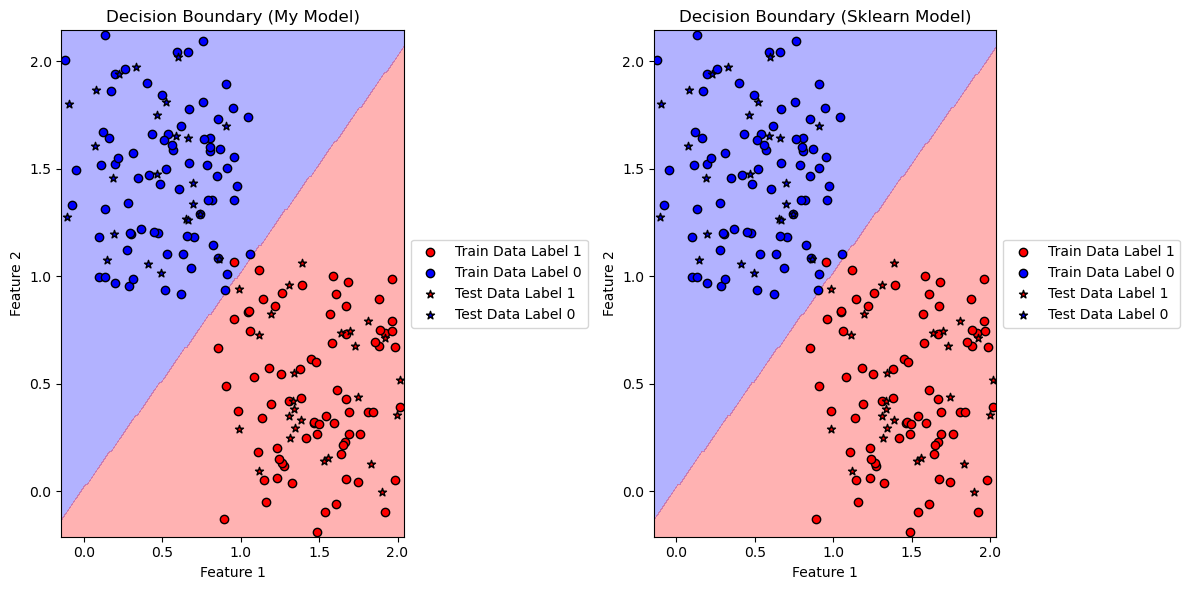

The Accuracy of My Logistic Regression Model is  1.0
The Accuracy of Sklearn SGD Classifier is  1.0


In [30]:
np.random.seed(0)

# generate two linear seperated datasets
class_0 = np.random.rand(100, 2) + [0, 1]  
class_1 = np.random.rand(100, 2) + [1, 0]  

# add noises
noise_0 = np.random.normal(0, 0.1, class_0.shape)
noise_1 = np.random.normal(0, 0.1, class_1.shape)
class_0 += noise_0
class_1 += noise_1

X2 = np.vstack((class_0, class_1))
Y2 = np.hstack((np.zeros(100), np.ones(100)))

# Split train and test datasets
indices = np.arange(X2.shape[0])
shuffled_inds = np.random.permutation(indices)
X2 = X2[shuffled_inds]
Y2 = Y2[shuffled_inds]
X2_train = X2[indices[:150]]
Y2_train = Y2[indices[:150]]
X2_test = X2[indices[-51:-1]]
Y2_test = Y2[indices[-51:-1]]

# check
CheckPlot_LR(X=X2_train, Y=Y2_train, X_test=X2_test, Y_test=Y2_test, 
             lr=0.01, num_epochs=1000)


### Non-Linearly separated datasets

my weight [[ 0.24914005 -0.21565882 -0.09311305]]
sklearn weight [ 0.24952692 -0.21716862] -0.09221755088027982


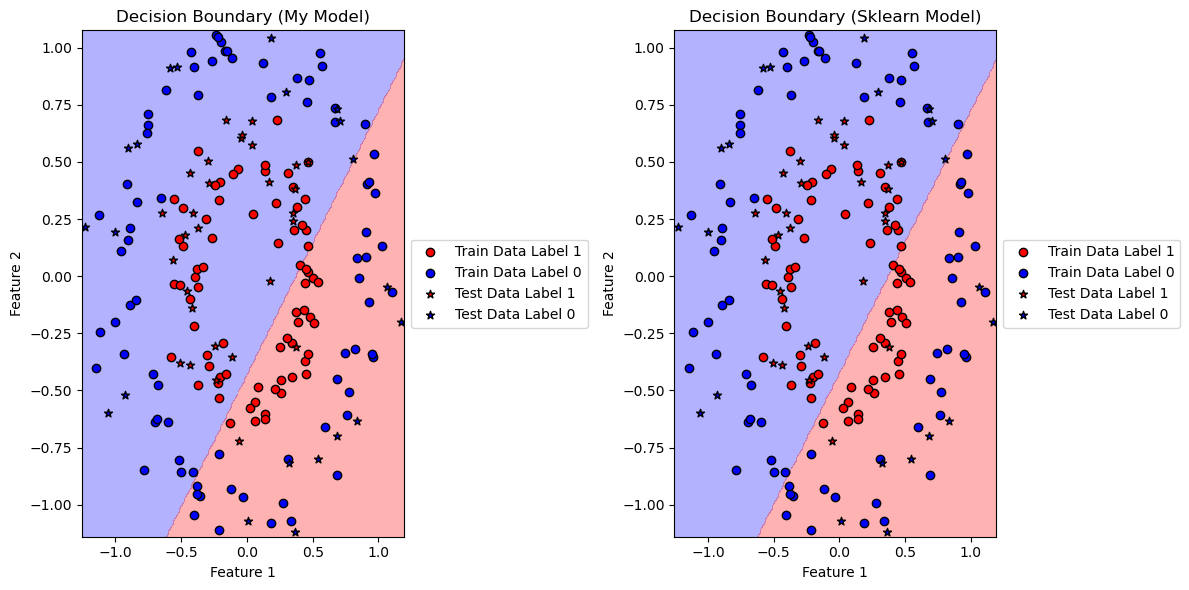

The Accuracy of My Logistic Regression Model is  0.3
The Accuracy of Sklearn SGD Classifier is  0.3


In [31]:
from sklearn.datasets import make_circles
np.random.seed(0)

# Generate circle-like datasets
X3, Y3 = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=0)
indices = np.arange(X3.shape[0])
shuffled_inds = np.random.permutation(indices)
X3 = X3[shuffled_inds]
Y3 = Y3[shuffled_inds]
X3_train = X3[indices[:150]]
Y3_train = Y3[indices[:150]]
X3_test = X3[indices[-51:-1]]
Y3_test = Y3[indices[-51:-1]]

# check
CheckPlot_LR(X=X3_train, Y=Y3_train, X_test=X3_test, Y_test=Y3_test, 
             lr=0.01, num_epochs=10000)


### High Dimensional Datasets

In [32]:
from sklearn.datasets import make_classification
import numpy as np

np.random.seed(0)

# Generate a high-dimensional dataset for binary classification
X4, Y4 = make_classification(
    n_samples=300,          # Number of samples
    n_features=10,          # Total number of features
    n_informative=8,        # Number of informative features
    n_redundant=1,          # Number of redundant features
    n_classes=2,             # Binary classification
    random_state=0          # Reproducibility
)

indices = np.arange(X4.shape[0])
shuffled_inds = np.random.permutation(indices)
X4 = X4[shuffled_inds]
Y4 = Y4[shuffled_inds]
X4_train = X4[indices[:225]]
Y4_train = Y4[indices[:225]]
X4_test = X4[indices[-76:-1]]
Y4_test = Y4[indices[-76:-1]]

# set parameters for the learning
num_epochs = 1000
lr =0.01
X4_train_bias = np.c_[X4_train, np.ones(X4_train.shape[0])]
X4_test_bias = np.c_[X4_test, np.ones(X4_test.shape[0])]
my_model = MyLogisticRegression(lr=lr, batch_size=1, num_epochs=num_epochs)
my_model.train(X4_train_bias, Y4_train)

# train sklearn model
# SGDClassifier is always batch_size == 1
sklearn_model = SGDClassifier(
loss='log_loss',
tol=None,
max_iter=num_epochs,
shuffle=True,
random_state=0,
learning_rate='constant',
eta0=lr,
alpha=0)
sklearn_model.fit(X4_train, Y4_train)

weights = my_model.weights
assert isinstance(weights, np.ndarray)
assert weights.ndim==2 and weights.shape == (1,X4_train.shape[1]+1)

# print(weights)
# print(sklearn_model.coef_[0])
# print(sklearn_model.intercept_[0])
assert weights[0][:-1] == pytest.approx(sklearn_model.coef_[0], 0.01)
assert weights[0][-1] == pytest.approx(sklearn_model.intercept_[0], 0.01)

my_preds = my_model.predict(X4_test_bias)
sklearn_preds = sklearn_model.predict(X4_test)
assert (my_preds == sklearn_preds).all()

'''
We can't reproduce the results when the dimension of the feature space is high
'''

AssertionError: 

## **Check Model: one-vs-all**

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

def CheckPlot_OnevsAll(X_train, Y_train, X_test, Y_test, lr, num_epochs):
    X_train_bias = np.c_[X_train, np.ones(X_train.shape[0])]
    X_test_bias = np.c_[X_test, np.ones(X_test.shape[0])]

    # initialize model
    n_classes = len(np.unique(Y_train))
    my_model = OnevsAll(n_classes, epochs=num_epochs, lr=lr)
    estimator = get_estimator(num_epochs, lr)
    sklearn_model = OneVsRestClassifier(estimator)

    my_model.train(X_train_bias, Y_train)
    sklearn_model.fit(X_train, Y_train)

    # generate meshgrids and predict on it
    x_min = min(X_train[:, 0].min(), X_test[:, 0].min())
    x_max = max(X_train[:, 0].max(), X_test[:, 0].max())
    y_min = min(X_train[:, 1].min(), X_test[:, 1].min())
    y_max = max(X_train[:, 1].max(), X_test[:, 1].max())
    x_gap = x_max - x_min
    y_gap = y_max - y_min

    xx, yy = np.meshgrid(np.linspace(x_min -x_gap/100, x_max + x_gap/100, 200), np.linspace(y_min-y_gap/100, y_max + y_gap/100, 200))
    bias = np.ones(xx.ravel().shape) 
    features_with_bias = np.c_[xx.ravel(), yy.ravel(), bias] 

    my_Z = np.array(my_model.predict(features_with_bias))
    my_Z = my_Z.reshape(xx.shape)

    sklearn_Z = sklearn_model.predict(np.c_[xx.ravel(), yy.ravel()])
    sklearn_Z = sklearn_Z.reshape(xx.shape)

    # check test data predictions
    my_preds = my_model.predict(X_test_bias)
    sklearn_preds = sklearn_model.predict(X_test)
    assert (my_preds == sklearn_preds).all()

    # Step 6: Visualize the decision boundaries
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Custom OvA model
    axes[0].contourf(xx, yy, my_Z.reshape(xx.shape), alpha=0.3, cmap="coolwarm")
    axes[0].scatter(X_train[:, 0], X_train[:, 1],
                    c=Y_train, edgecolor="k",  cmap="coolwarm", label='Train Data')
    axes[0].scatter(X_test[:, 0], X_test[:, 1],
                    c=Y_test, edgecolor="k",  cmap="coolwarm", marker='*', label='Test Data')    
    axes[0].set_title("My One-vs-All Model")
    axes[0].set_xlabel("Feature 1")
    axes[0].set_ylabel("Feature 2")
    axes[0].legend()

    # Sklearn OvA model
    axes[1].contourf(xx, yy, sklearn_Z.reshape(xx.shape), alpha=0.3, cmap="coolwarm")
    axes[1].scatter(X_train[:, 0], X_train[:, 1],
                    c=Y_train, edgecolor="k",  cmap="coolwarm", label='Train Data')
    axes[1].scatter(X_test[:, 0], X_test[:, 1],
                    c=Y_test, edgecolor="k",  cmap="coolwarm", marker='*', label='Test Data')    
    axes[1].set_title("Sklearn One-vs-Rest Model")
    axes[1].set_xlabel("Feature 1")
    axes[1].set_ylabel("Feature 2")
    axes[1].legend()

    plt.tight_layout()
    plt.show()
    

### 10-Point Toy Model

In [34]:
import numpy as np
import pytest
from sklearn.datasets import load_iris
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier

np.random.seed(0)

X = np.array([[0,4], [0,3], [5,0], [4,1], [0,5], [1,0], [2,1], [3,2], [4,3], [5,4]])
X_bias = np.array([[0,4,1], [0,3,1], [5,0,1], [4,1,1], [0,5,1], [1,0,1], [2,1,1], [3,2,1], [4,3,1], [5,4,1]])
Y = np.array([0,0,0,1,1,1,1,2,2,2])
n_classes = len(np.unique(Y))

# Initialize models:
train_epochs = 10000
lr = 0.01
my_model = OnevsAll(n_classes, epochs=train_epochs, lr=lr)

estimator = get_estimator(train_epochs, lr)
sklearn_model = OneVsRestClassifier(estimator)

my_model.train(X_bias, Y)
sklearn_model.fit(X, Y)

# Check that S is populated correctly
assert my_model.S_Y.shape[0] == n_classes
assert my_model.S_Y.shape[1] == Y.shape[0]

# Check h (individual classifiers)
assert len(my_model.h) == n_classes
assert len(sklearn_model.estimators_) == n_classes
for h in my_model.h:
    assert isinstance(h, MyLogisticRegression)
for i in range(n_classes):
    my_weights = my_model.h[i].weights[0][:-1]
    my_bias = my_model.h[i].weights[0][-1]
    sklearn_weights = sklearn_model.estimators_[i].coef_[0]
    sklearn_bias = sklearn_model.estimators_[i].intercept_[0]
    print(" === ", i)
    print(my_weights)
    print(sklearn_weights)
    print(my_bias)
    print(sklearn_bias)

    # assert my_weights == pytest.approx(sklearn_weights, 0.01)
    # assert my_bias == pytest.approx(sklearn_bias, 0.01)

# Check predictions
predictions = my_model.predict(X_bias)
print("My Predictions:", np.array(predictions))

sklearn_predictions = sklearn_model.predict(X)
print("sklearn Predictions:", sklearn_predictions)

print('num_samples', X.shape[0])
print('Differences', np.sum(np.abs(np.array(predictions)-sklearn_predictions)))

 ===  0
[-0.33453375 -0.1320673 ]
[-0.33166964 -0.13559398]
0.1830320858966674
0.15734472139464065
 ===  1
[-0.59906046 -0.68054398]
[-0.60283135 -0.68803744]
2.4640465673449325
2.482162129631214
 ===  2
[2.07154367 2.03752407]
[2.0630619  2.03812239]
-11.372403829860316
-11.34887388810991
My Predictions: [1 1 1 1 0 1 1 1 2 2]
sklearn Predictions: [1 1 1 1 0 1 1 1 2 2]
num_samples 10
Differences 0


### Linearly-separated Datasets

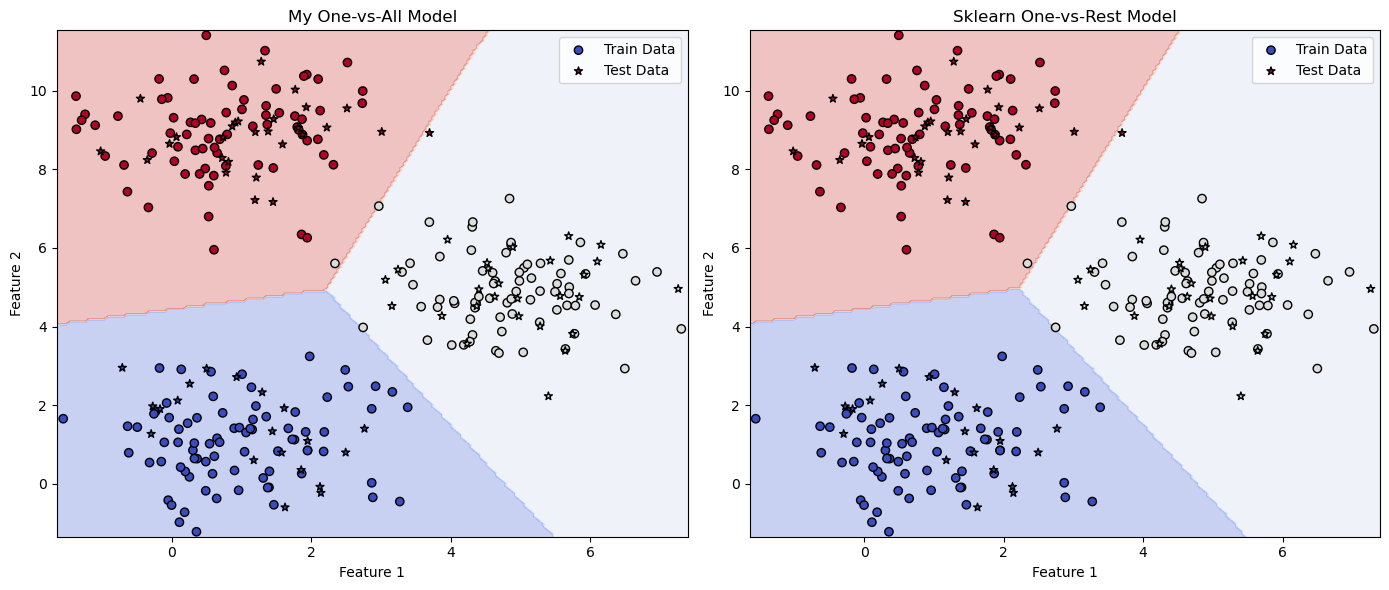

In [35]:
import numpy as np

np.random.seed(0)

# Generate 100 samples for each class
n_samples = 100

# class 0 centered on [1,1]
class_1 = np.random.randn(n_samples, 2) + [1, 1]

# class 1 centered on [6,6]
class_2 = np.random.randn(n_samples, 2) + [5, 5]

# class 2 centered on [3,4]
class_3 = np.random.randn(n_samples, 2) + [1, 9]


X5 = np.vstack([class_1, class_2, class_3])
Y5 = np.hstack([np.zeros(n_samples), np.ones(n_samples), np.full(n_samples, 2)]) 

indices = np.arange(X5.shape[0])
shuffled_inds = np.random.permutation(indices)
X5 = X5[shuffled_inds]
Y5 = Y5[shuffled_inds]
X5_train = X5[indices[:225]]
Y5_train = Y5[indices[:225]]
X5_test = X5[indices[-76:-1]]
Y5_test = Y5[indices[-76:-1]]

#check
CheckPlot_OnevsAll(X5_train, Y5_train, X5_test, Y5_test, lr=0.01, num_epochs=1000)

### Non-linearly Separated Data

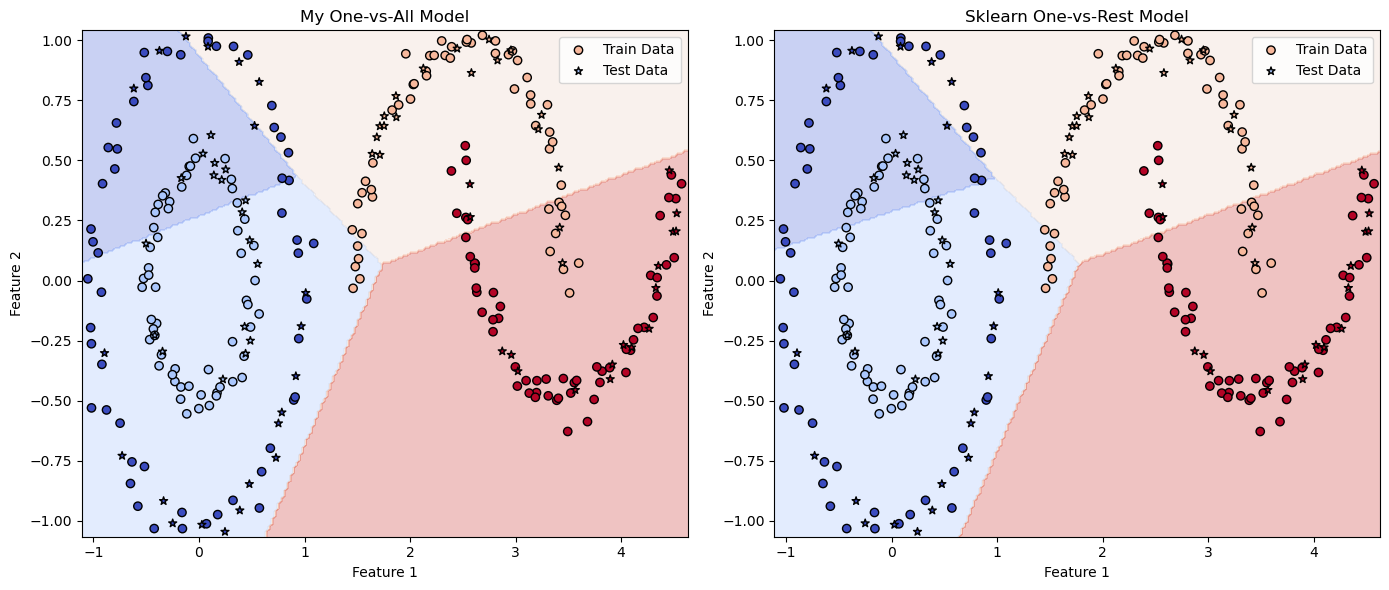

In [36]:
from sklearn.datasets import make_circles, make_moons
np.random.seed(0)

x1, y1 = make_circles(n_samples=150, noise=0.05, factor=0.5, random_state=0)
x2, y2 = make_moons(n_samples=150, noise=0.05, random_state=0)
x2 += np.array([2.5, 0]) 
y2 += 2 

X6 = np.vstack([x1, x2])
Y6 = np.hstack([y1, y2])

indices = np.arange(X5.shape[0])
shuffled_inds = np.random.permutation(indices)
X6 = X6[shuffled_inds]
Y6 = Y6[shuffled_inds]
X6_train = X6[indices[:225]]
Y6_train = Y6[indices[:225]]
X6_test = X6[indices[-76:-1]]
Y6_test = Y6[indices[-76:-1]]

#check
CheckPlot_OnevsAll(X6_train, Y6_train, X6_test, Y6_test, lr=0.01, num_epochs=10000)


## **Check Model: all-pairs**

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

def CheckPlot_AllPairs(X_train, Y_train, X_test, Y_test, lr, num_epochs):
    X_train_bias = np.c_[X_train, np.ones(X_train.shape[0])]
    X_test_bias = np.c_[X_test, np.ones(X_test.shape[0])]

    # initialize model
    n_classes = len(np.unique(Y_train))
    my_model = AllPairs(n_classes=n_classes, conv_threshold=0.001, 
                        batch_size=1, epochs=num_epochs, lr=lr)
    sklearn_model = OneVsOneClassifier(LinearSVC(random_state=0))

    my_model.train(X_train_bias, Y_train)
    sklearn_model.fit(X_train, Y_train)

    # generate meshgrids and predict on it
    x_min = min(X_train[:, 0].min(), X_test[:, 0].min())
    x_max = max(X_train[:, 0].max(), X_test[:, 0].max())
    y_min = min(X_train[:, 1].min(), X_test[:, 1].min())
    y_max = max(X_train[:, 1].max(), X_test[:, 1].max())
    x_gap = x_max - x_min
    y_gap = y_max - y_min

    xx, yy = np.meshgrid(np.linspace(x_min -x_gap/100, x_max + x_gap/100, 200), np.linspace(y_min-y_gap/100, y_max + y_gap/100, 200))
    bias = np.ones(xx.ravel().shape) 
    features_with_bias = np.c_[xx.ravel(), yy.ravel(), bias] 

    my_Z = np.array(my_model.predict(features_with_bias))
    my_Z = my_Z.reshape(xx.shape)

    sklearn_Z = sklearn_model.predict(np.c_[xx.ravel(), yy.ravel()])
    sklearn_Z = sklearn_Z.reshape(xx.shape)

    # check test data predictions
    my_preds = my_model.predict(X_test_bias)
    sklearn_preds = sklearn_model.predict(X_test)
    assert (my_preds == sklearn_preds).all()

    # Step 6: Visualize the decision boundaries
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Custom OvA model
    axes[0].contourf(xx, yy, my_Z.reshape(xx.shape), alpha=0.3, cmap="coolwarm")
    axes[0].scatter(X_train[:, 0], X_train[:, 1],
                    c=Y_train, edgecolor="k",  cmap="coolwarm", label='Train Data')
    axes[0].scatter(X_test[:, 0], X_test[:, 1],
                    c=Y_test, edgecolor="k",  cmap="coolwarm", marker='*', label='Test Data')    
    axes[0].set_title("My AllPair Model")
    axes[0].set_xlabel("Feature 1")
    axes[0].set_ylabel("Feature 2")
    axes[0].legend()

    # Sklearn OvA model
    axes[1].contourf(xx, yy, sklearn_Z.reshape(xx.shape), alpha=0.3, cmap="coolwarm")
    axes[1].scatter(X_train[:, 0], X_train[:, 1],
                    c=Y_train, edgecolor="k",  cmap="coolwarm", label='Train Data')
    axes[1].scatter(X_test[:, 0], X_test[:, 1],
                    c=Y_test, edgecolor="k",  cmap="coolwarm", marker='*', label='Test Data')    
    axes[1].set_title("Sklearn Allpair Model")
    axes[1].set_xlabel("Feature 1")
    axes[1].set_ylabel("Feature 2")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

### Linearly Seperated Datasets

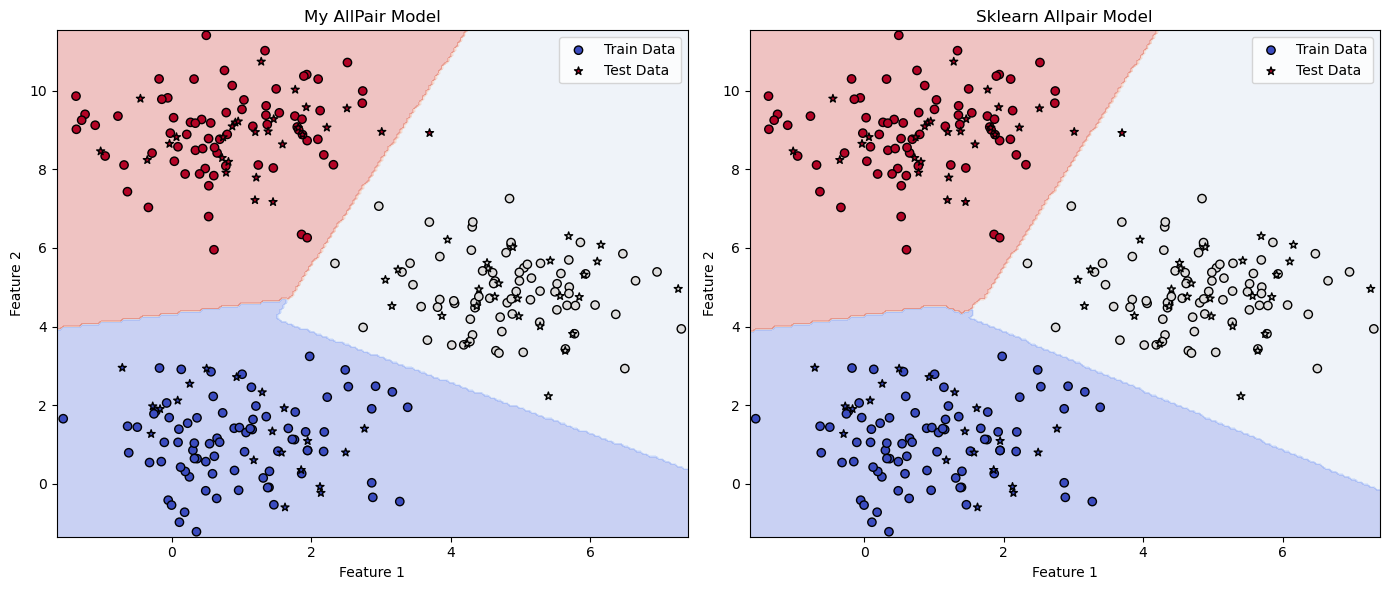

In [38]:
CheckPlot_AllPairs(X5_train, Y5_train, X5_test, Y5_test, 0.01, 5000)

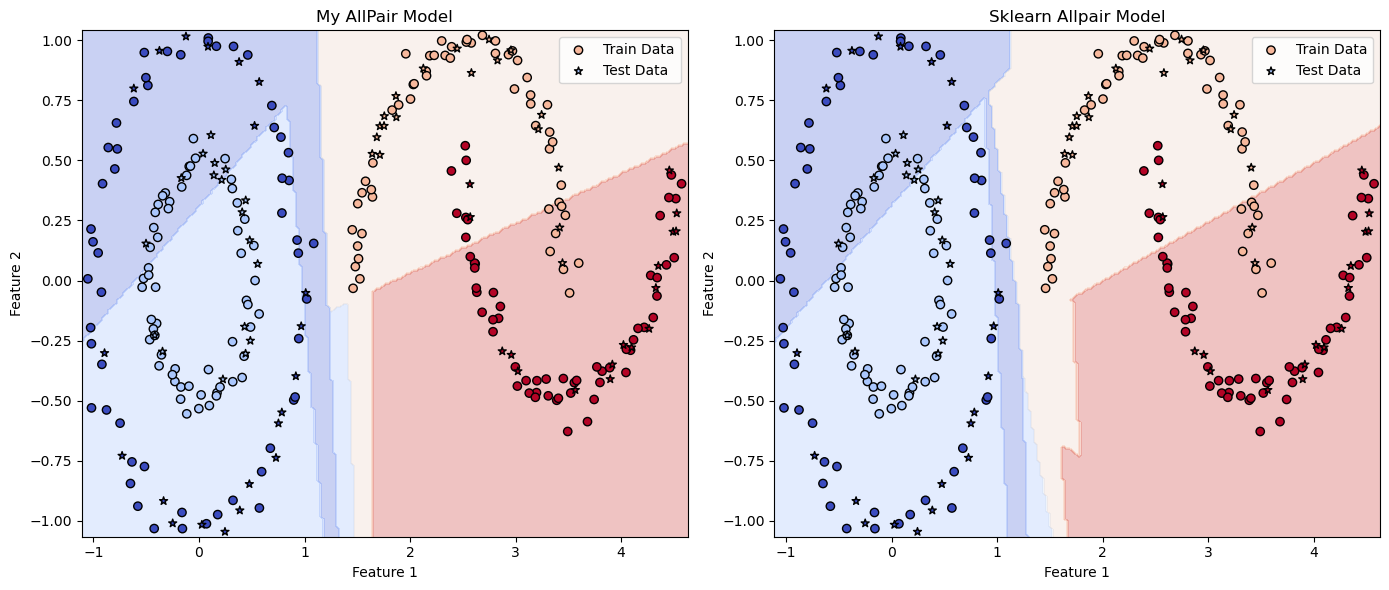

In [43]:
CheckPlot_AllPairs(X6_train, Y6_train, X6_test, Y6_test, 0.001, 10000)

## **Performance on Iris Dataset**

### One-vs-all Model

In [41]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

np.random.seed(0)

data = load_iris()

X = data.data
bias_col = np.ones((X.shape[0], 1))
X_biased = np.hstack((X, bias_col))

Y = data.target
n_classes = len(np.unique(Y))

# Initialize models:
train_epochs = 5000
lr = 0.01
my_model = OnevsAll(n_classes, epochs=train_epochs, lr=lr)
my_model.train(X_biased, Y)

estimator = get_estimator(train_epochs, lr)
sklearn_model = OneVsRestClassifier(estimator)
sklearn_model.fit(X, Y)

my_preds = my_model.predict(X_biased)
sklearn_preds = sklearn_model.predict(X)

print("PredictionsA:", np.array(my_preds))
print("PredictionsB:", sklearn_preds)

print('num_samples', X.shape[0])
print('Differences', np.sum(np.abs(np.array(my_preds)-sklearn_preds)))

PredictionsA: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
PredictionsB: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
num_samples 150
Differences 1


### All-Pairs Model

In [42]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

np.random.seed(0)

data = load_iris()

X = data.data
bias_col = np.ones((X.shape[0], 1))
X_biased = np.hstack((X, bias_col))

Y = data.target
n_classes = len(np.unique(Y))

model = AllPairs(n_classes=n_classes, conv_threshold=0.001, batch_size=10, epochs=5000, lr=0.01)
model.train(X_biased, Y)



predictions = model.predict(X_biased)


print("PredictionsA:", np.array(predictions))

sklearn_predictions = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X, Y).predict(X)
print("PredictionsB:", sklearn_predictions)

print('num_samples', X.shape[0])
print('Differences', np.sum(np.abs(np.array(predictions)-sklearn_predictions)))

PredictionsA: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
PredictionsB: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
num_samples 150
Differences 0
